In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/piper_robot_arm_end_pose_and_joint_angle_data_more_data.csv")
df = df.iloc[1:,]
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()


,joint1,joint2,joint3,joint4,joint5,joint6,X_axis,Y_axis,Z_axis
1,0,0,0,0,0,0,56127,0,213266
2,0,0,0,0,0,0,56127,0,213266
3,-28,0,-27,0,-692,0,55999,-28,214521
4,-28,0,37,0,547,0,56232,-28,212180
5,0,0,0,0,0,0,56127,0,213266


In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = pd.DataFrame()
df_scaled[df.columns] = mms.fit_transform(df)
df_scaled.head()

,joint1,joint2,joint3,joint4,joint5,joint6,X_axis,Y_axis,Z_axis
0,0.504961,0.017575,0.997176,0.492374,0.502292,0.2155,0.498509,0.500223,0.322423
1,0.504961,0.017575,0.997176,0.492374,0.502292,0.2155,0.498509,0.500223,0.322423
2,0.504871,0.017575,0.997022,0.492374,0.497708,0.2155,0.498396,0.500200,0.324006
3,0.504871,0.017575,0.997388,0.492374,0.505915,0.2155,0.498602,0.500200,0.321053
4,0.504961,0.017575,0.997176,0.492374,0.502292,0.2155,0.498509,0.500223,0.322423


<Axes: xlabel='joint1', ylabel='X_axis'>

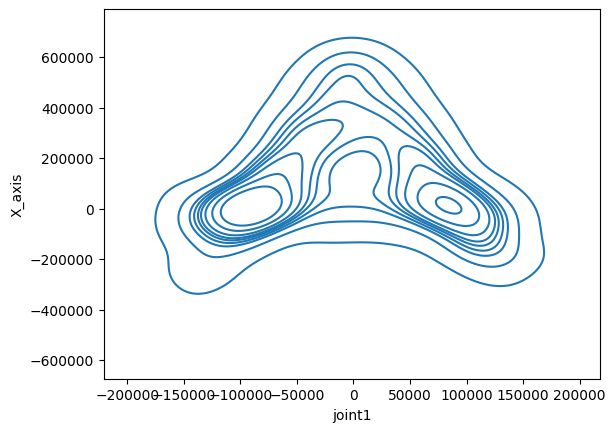

In [4]:
import seaborn as sns
sns.kdeplot(df,x="joint1",y="X_axis")


<Axes: xlabel='joint1', ylabel='X_axis'>

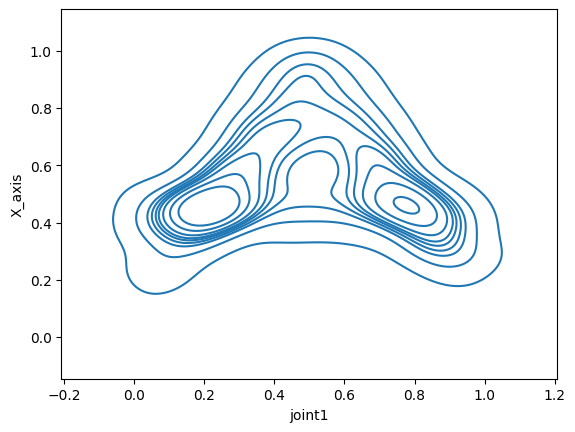

In [5]:
import seaborn as sns
sns.kdeplot(df_scaled,x="joint1",y="X_axis")


In [6]:
X = df_scaled.iloc[:,6:]
X.head()

,X_axis,Y_axis,Z_axis
0,0.498509,0.500223,0.322423
1,0.498509,0.500223,0.322423
2,0.498396,0.500200,0.324006
3,0.498602,0.500200,0.321053
4,0.498509,0.500223,0.322423


In [7]:
y = df_scaled.iloc[:,:6]
y.head()

,joint1,joint2,joint3,joint4,joint5,joint6
0,0.504961,0.017575,0.997176,0.492374,0.502292,0.2155
1,0.504961,0.017575,0.997176,0.492374,0.502292,0.2155
2,0.504871,0.017575,0.997022,0.492374,0.497708,0.2155
3,0.504871,0.017575,0.997388,0.492374,0.505915,0.2155
4,0.504961,0.017575,0.997176,0.492374,0.502292,0.2155


In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.5594367436727827